# How to extract data from spotify using spotify api

# Import libraries

In [1]:
!pip install python-dotenv spotipy
!pip install spotipy
!pip install spotipy-random

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.8/251.8 kB 5.9 MB/s eta 0:00:0000:01
  Attempting uninstall: async-timeout
    Found existing installation: async-timeout 4.0.2
    Uninstalling async-timeout-4.0.2:
      Successfully uninstalled async-timeout-4.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.4.0 requires botocore<1.27.60,>=1.27.59, but you have botocore 1.27.93 which is incompatible.


In [2]:

import csv
import pandas as pd
import spotipy as spotipy
from spotipy.oauth2 import SpotifyClientCredentials 
from spotipy_random import get_random


In [3]:
input_df=pd.read_csv('/kaggle/input/30000-spotify-songs/spotify_songs.csv',encoding='latin-1')
input_df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [4]:
input_popularity=input_df['track_popularity']
print(input_popularity.value_counts().sort_index().to_string())

0      2703
1       575
2       387
3       321
4       240
5       240
6       192
7       189
8       201
9       195
10      174
11      172
12      161
13      207
14      201
15      190
16      219
17      206
18      242
19      205
20      209
21      228
22      207
23      228
24      243
25      242
26      272
27      271
28      266
29      277
30      345
31      323
32      351
33      377
34      388
35      433
36      431
37      435
38      483
39      459
40      486
41      442
42      428
43      464
44      472
45      505
46      430
47      496
48      465
49      497
50      498
51      514
52      506
53      472
54      514
55      492
56      497
57      541
58      503
59      467
60      514
61      492
62      470
63      483
64      424
65      462
66      441
67      468
68      425
69      443
70      410
71      408
72      339
73      357
74      353
75      306
76      334
77      326
78      224
79      265
80      172
81      167
82      126
83  

In [5]:
input_album_ds=input_df['playlist_genre']
input_album_ds=input_album_ds.drop_duplicates(inplace=False)
# input_album_ds=input_album_ds.to_list()+(['jazz','country','emo','punk','folk','classical'])
# input_album_ds=['grunge','blues','electronic','reggaeton','metal','funk','world']
input_album_ds=['trap','k-pop','disco','lounge','anime','salsa','trance','screamo','dream','samba','bachata','electro','redneck','ska','cartoon','celtic','focus','lo-fi','asmr','nursery','idol','narodna muzika','comedy','freestyle','pastoral','balkan trap']
print(input_album_ds)


['trap', 'k-pop', 'disco', 'lounge', 'anime', 'salsa', 'trance', 'screamo', 'dream', 'samba', 'bachata', 'electro', 'redneck', 'ska', 'cartoon', 'celtic', 'focus', 'lo-fi', 'asmr', 'nursery', 'idol', 'narodna muzika', 'comedy', 'freestyle', 'pastoral', 'balkan trap']


# Authenticate with Spotipy

In [3]:
client_id = '0a902577534d490eac50566abcaa7b2b'
client_secret = '55abb6ece7b8474da7b71c5e1cb5e5ae'

client_credentials_manager = SpotifyClientCredentials(client_id = client_id, client_secret = client_secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [4]:
output_df=pd.DataFrame(columns=['name','popularity','id'])
output_df.head()
output_df_=pd.DataFrame(columns=['name','popularity','danceability',  'energy',  'key',  'loudness',  'mode',  'speechiness',  'acousticness','instrumentalness','liveness','valence','tempo','type','id','uri','track_href','analysis_url','duration_ms','time_signature'])
output_df_.head()

,name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature


In [13]:
try:
    print(input_album_ds)
    # dict_=dict.fromkeys([genre for genre in input_album_ds],[0,0,0])
    dict_={genre: [0, 0] for genre in input_album_ds}
    print(dict_)
    for genre in input_album_ds:
    #     random_pop_song_json: str = get_random(spotify=sp, type="track", genre=genre)
        while(True):
            temp=get_random(spotify=sp, type="track", genre=genre,limit=50)
    #         print(temp)ghj
    #         print(temp.keys())
            popular=int(temp['popularity'])
    #         print(popular,genre)
            if popular<60 and dict_[genre][0]<=20: dict_[genre][0]=dict_[genre][0]+1
            elif popular>=60 and dict_[genre][1]<=20: dict_[genre][1]=dict_[genre][1]+1
    #         elif popular>40 and popular<60 and dict_[genre][1]<=20: dict_[genre][1]=dict_[genre][1]+1
            else:continue
            print(dict_)
            temp_={'name':temp['name'],'popularity':popular,'id':temp['id']}
    #         temp_.update(sp.audio_features(temp['id'])[0])
    #         print(len(temp_),len(output_df.columns))
            temp_ds=pd.DataFrame(data=temp_,index=[1])
            output_df=pd.concat([output_df,temp_ds])
    #         print(temp_ds)
    #         if dict_[genre][0]>=20 and dict_[genre][1]>=20 and dict_[genre][1]>=20:break
            if all(value >= 20 for value in dict_[genre]):
                break
except:
    output_df.to_csv('output_final')

['trap', 'k-pop', 'disco', 'lounge', 'anime', 'salsa', 'trance', 'screamo', 'dream', 'samba', 'bachata', 'electro', 'redneck', 'ska', 'cartoon', 'celtic', 'focus', 'lo-fi', 'asmr', 'nursery', 'idol', 'narodna muzika', 'comedy', 'freestyle', 'pastoral', 'balkan trap']
{'trap': [0, 0], 'k-pop': [0, 0], 'disco': [0, 0], 'lounge': [0, 0], 'anime': [0, 0], 'salsa': [0, 0], 'trance': [0, 0], 'screamo': [0, 0], 'dream': [0, 0], 'samba': [0, 0], 'bachata': [0, 0], 'electro': [0, 0], 'redneck': [0, 0], 'ska': [0, 0], 'cartoon': [0, 0], 'celtic': [0, 0], 'focus': [0, 0], 'lo-fi': [0, 0], 'asmr': [0, 0], 'nursery': [0, 0], 'idol': [0, 0], 'narodna muzika': [0, 0], 'comedy': [0, 0], 'freestyle': [0, 0], 'pastoral': [0, 0], 'balkan trap': [0, 0]}
{'trap': [0, 1], 'k-pop': [0, 0], 'disco': [0, 0], 'lounge': [0, 0], 'anime': [0, 0], 'salsa': [0, 0], 'trance': [0, 0], 'screamo': [0, 0], 'dream': [0, 0], 'samba': [0, 0], 'bachata': [0, 0], 'electro': [0, 0], 'redneck': [0, 0], 'ska': [0, 0], 'cartoon':

In [ ]:
import numpy as np
# import threading
temp_dict=dict.fromkeys([x for x in range(101)])
for v in temp_dict:
    temp_dict[v]=0
for album_id in input_album_ds:
    print(album_id)
    tracks = sp.album_tracks(album_id)
    print(tracks)
    print(temp_dict.values())

#     print(sp.audio_analysis(tracks['items'][0]['id']))
#     print(sp.audio_features(tracks['items'][0]['id'])[0][''])
    for track_id in tracks['items']:
#         print(sp.track(track_id['id']).keys())#popularity
#         print(sp.track(track_id['id'])['name'])#popularity
        popular=sp.track(track_id['id'])['popularity']
#         print(album_id)
        if temp_dict[popular]>25: continue
        temp_dict[popular]=temp_dict[popular]+1
#         print(album_id)

#         print(sp.track(track_id['id'])['popularity'])#popularity
#         print(pd.DataFrame(data=sp.audio_features(track_id['id'])[0],index=[1]))
        temp={'name':sp.track(track_id['id'])['name'],'popularity':popular}
        temp.update(sp.audio_features(track_id['id'])[0])
#         print(temp)
        temp=pd.DataFrame(data=temp,index=[1])
        output_df=pd.concat([output_df,temp])


In [9]:
output_df_.drop(output_df.tail(1).index,
        inplace = True)

In [11]:
print(output_df_['popularity'].value_counts().sort_index().to_string(),output_df['popularity'].shape)

Series([], ) (0,)


In [14]:
output_df.to_csv('output_df_finall.csv')


In [5]:
df_=pd.read_csv('/kaggle/input/final-3/check (3).csv')
# print(df.head(),df.shape)
# df=df.append(output_df)
# df.shape

In [32]:
merged = df_.drop(df_[df_['hit'] == 'hit'].head(49).index)

In [33]:
print(merged['hit'].value_counts().sort_index().to_string())
print(df_['hit'].value_counts().sort_index().to_string())

flop    499
hit     425
flop    625
hit     674


In [30]:
remove_indices = df_[df_['hit'] == 'hit'].sample(frac=0.05).index
merged_set = df_.drop(remove_indices)
merged_set.shape

(1018, 17)

In [22]:
last=0
leftover=df.shape[0]%100
df_temp=None
df_=None
# print(leftover)
# print(df[0:2],df['id'][0:2])
# print(df['name'][0:2].to_dict())
# for k in df['name'][0:2].to_dict().keys:
#     df['name'][0:2].to_dict()[].update()
#     print()
for ids in range(0,df.shape[0],100):
#     print(df['id'][last:ids])
    if ids==0:continue
    df_temp=pd.merge(df[last:ids],pd.DataFrame(sp.audio_features(list(df['id'][last:ids]))),on='id', how='inner')#list of dictionaries
    df_=pd.concat([df_,df_temp])
    last=ids
#     extra=pd.DataFrame(sp.audio_features(output_df[last:ids])[0])
#     temp={'name':sp.track(track_id['id'])['name'],'popularity':popular}
#     temp.update(sp.audio_features(track_id['id'])[0])
    #         print(temp)
#     temp=pd.DataFrame(data=temp,index=[1])
#     output_df=pd.concat([output_df,temp])
#     print(extra)
#     break

if leftover>0:
    df_=pd.concat([df_,pd.merge(df[-1*leftover-1:],pd.DataFrame(sp.audio_features(df['id'][-1*leftover-1:])),on='id', how='inner')])#list of dictionaries
df_=df_.iloc[:,1:]
df_.drop(['uri','track_href','analysis_url','type'], axis=1,inplace=True)
# df_.insert(-1,'hit',None)

df_.loc[df_['popularity'] <60,'hit']='flop'
df_.loc[df_['popularity'] >= 60, 'hit'] = 'hit'
df_.drop_duplicates(subset=['id'],inplace=True)
print(df_.shape)
df_.to_csv('check.csv')
# df_.shape
# print(df_['hit'].value_counts().sort_index().to_string(),df_.shape)

(1299, 17)


In [ ]:
#balance, graph
#no null
#scaler

In [6]:
# print(df_['time_signature'].value_counts().sort_index().to_string())
df_=df_.astype({'key':'category','mode':'category','time_signature':'category','hit':'category'})
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Unnamed: 0        1299 non-null   int64   
 1   name              1299 non-null   object  
 2   popularity        1299 non-null   int64   
 3   id                1299 non-null   object  
 4   danceability      1299 non-null   float64 
 5   energy            1299 non-null   float64 
 6   key               1299 non-null   category
 7   loudness          1299 non-null   float64 
 8   mode              1299 non-null   category
 9   speechiness       1299 non-null   float64 
 10  acousticness      1299 non-null   float64 
 11  instrumentalness  1299 non-null   float64 
 12  liveness          1299 non-null   float64 
 13  valence           1299 non-null   float64 
 14  tempo             1299 non-null   float64 
 15  duration_ms       1299 non-null   int64   
 16  time_signature    1299 n

In [7]:
from sklearn.preprocessing import StandardScaler
import numpy as np
X=df_.iloc[:,4:-3]
y=df_.iloc[:,-1:]
y = y.values.ravel()

X_scaled = StandardScaler().fit_transform(X)

In [8]:
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score

kf=KFold(n_splits=2,shuffle=True, random_state=42)
skf=StratifiedKFold(n_splits=2,shuffle=True, random_state=42)

# print(cross_val_score(RandomForestClassifier(criterion='gini'), X_scaled, y, cv=kf).mean())
# print(cross_val_score(HistGradientBoostingClassifier(), X_scaled, y, cv=kf).mean())
# print(cross_val_score(GradientBoostingClassifier(), X_scaled, y, cv=kf).mean())
# print(cross_val_score(MLPClassifier(max_iter=10000), X_scaled, y, cv=kf).mean())
# print(cross_val_score(MLPClassifier(activation='tanh',max_iter=10000), X_scaled, y, cv=kf).mean())
print(cross_val_score(RandomForestClassifier(criterion='entropy'),X_scaled, y, cv=kf).mean())
print(cross_val_score(AdaBoostClassifier(), X_scaled, y, cv=kf).mean())
print(cross_val_score(ExtraTreesClassifier(),X_scaled, y, cv=kf).mean())
print(cross_val_score(ExtraTreesClassifier(criterion='entropy'),X_scaled, y, cv=kf).mean())
print(cross_val_score(MLPClassifier(activation='identity',max_iter=10000), X_scaled, y, cv=kf).mean())
print(cross_val_score(MLPClassifier(activation='logistic',max_iter=10000), X_scaled, y, cv=kf).mean())
print(cross_val_score(MLPClassifier(max_iter=10000,solver='sgd'), X_scaled, y, cv=kf).mean())
print(cross_val_score(MLPClassifier(activation='identity',max_iter=10000,solver='sgd'), X_scaled, y, cv=kf).mean())
print(cross_val_score(MLPClassifier(activation='logistic',max_iter=10000,solver='sgd'), X_scaled, y, cv=kf).mean())
print(cross_val_score(MLPClassifier(activation='tanh',max_iter=10000,solver='sgd'), X_scaled, y, cv=kf).mean())
print(cross_val_score(MLPClassifier(activation='identity',max_iter=10000,solver='lbfgs'), X_scaled, y, cv=kf).mean())
# print(cross_val_score(MLPClassifier(max_iter=10000,solver='lbfgs'), X_scaled, y, cv=kf).mean())
# print(cross_val_score(MLPClassifier(activation='logistic',max_iter=10000,solver='lbfgs'), X_scaled, y, cv=kf).mean())
# print(cross_val_score(MLPClassifier(activation='tanh',max_iter=10000,solver='lbfgs'), X_scaled, y, cv=kf).mean())


print()

# print(cross_val_score(RandomForestClassifier(criterion='gini'), X_scaled, y, cv=skf).mean())
# print(cross_val_score(RandomForestClassifier(criterion='entropy'), X_scaled, y, cv=skf).mean())
# print(cross_val_score(HistGradientBoostingClassifier(), X_scaled, y, cv=skf).mean())
# print(cross_val_score(AdaBoostClassifier(), X_scaled, y, cv=skf).mean())
# print(cross_val_score(ExtraTreesClassifier(), X_scaled, y, cv=skf).mean())
# print(cross_val_score(ExtraTreesClassifier(criterion='entropy'), X_scaled, y, cv=skf).mean())
# print(cross_val_score(GradientBoostingClassifier(), X_scaled, y, cv=skf).mean())
# print(cross_val_score(MLPClassifier(max_iter=10000), X_scaled, y, cv=skf).mean())
print(cross_val_score(MLPClassifier(activation='identity',max_iter=10000), X_scaled, y, cv=skf).mean())
print(cross_val_score(MLPClassifier(activation='logistic',max_iter=10000), X_scaled, y, cv=skf).mean())
# print(cross_val_score(MLPClassifier(activation='tanh',max_iter=10000), X_scaled, y, cv=skf).mean())
# print(cross_val_score(MLPClassifier(max_iter=10000,solver='sgd'), X_scaled, y, cv=skf).mean())
print(cross_val_score(MLPClassifier(activation='identity',max_iter=10000,solver='sgd'), X_scaled, y, cv=skf).mean())
print(cross_val_score(MLPClassifier(activation='logistic',max_iter=10000,solver='sgd'), X_scaled, y, cv=skf).mean())
print(cross_val_score(MLPClassifier(activation='tanh',max_iter=10000,solver='sgd'), X_scaled, y, cv=skf).mean())
# print(cross_val_score(MLPClassifier(max_iter=10000,solver='lbfgs'), X_scaled, y, cv=skf).mean())
print(cross_val_score(MLPClassifier(activation='identity',max_iter=10000,solver='lbfgs'), X_scaled, y, cv=skf).mean())
# print(cross_val_score(MLPClassifier(activation='logistic',max_iter=10000,solver='lbfgs'), X_scaled, y, cv=skf).mean())
# print(cross_val_score(MLPClassifier(activation='tanh',max_iter=10000,solver='lbfgs'), X_scaled, y, cv=skf).mean())





0.5604349887400735
0.5357911579945478
0.5581296669432263
0.5719864880881831
0.5481154438781557
0.5519615977243095
0.5604361739954961
0.5527320137489629
0.5204018015882422
0.5550456323337679
0.5511947374659238

0.560433803484651
0.5588929714353443
0.5604243214412705
0.5327237169610051
0.5527331990043854
0.5658207893801115


In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier, RidgeClassifier,LogisticRegression, Perceptron, PassiveAggressiveClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
models=[PassiveAggressiveClassifier(),Perceptron(),LogisticRegression(),RidgeClassifier(),LinearSVC(max_iter=10000),NuSVC(),SVC(kernel='linear'),SGDClassifier(),KNeighborsClassifier(n_neighbors=2),GaussianProcessClassifier(),GaussianNB(),DecisionTreeClassifier(criterion='gini'),DecisionTreeClassifier(criterion='entropy')]
kf_cross_val_dict={}
for modeli in models:
    kf_cross_val_dict[modeli]=[cross_val_score(modeli,X_scaled,y,cv=kf).mean(),cross_val_score(modeli,X_scaled,y,cv=skf).mean()]
    print('first')

models=[RandomForestClassifier(criterion='gini'),RandomForestClassifier(criterion='entropy'),HistGradientBoostingClassifier(),AdaBoostClassifier(),ExtraTreesClassifier(),ExtraTreesClassifier(criterion='entropy'),GradientBoostingClassifier(),MLPClassifier(max_iter=10000),MLPClassifier(activation='identity',max_iter=10000),MLPClassifier(activation='logistic',max_iter=10000),MLPClassifier(activation='tanh',max_iter=10000),MLPClassifier(max_iter=10000,solver='sgd'),MLPClassifier(activation='identity',max_iter=10000,solver='sgd'),MLPClassifier(activation='logistic',max_iter=10000,solver='sgd'),MLPClassifier(activation='tanh',max_iter=10000,solver='sgd'),MLPClassifier(max_iter=10000,solver='lbfgs'),MLPClassifier(activation='identity',max_iter=10000,solver='lbfgs'),MLPClassifier(activation='logistic',max_iter=10000,solver='lbfgs'),MLPClassifier(activation='tanh',max_iter=10000,solver='lbfgs')]
for modeli in models:
    kf_cross_val_dict[modeli]=[cross_val_score(modeli,X_scaled,y,cv=kf).mean(),cross_val_score(modeli,X_scaled,y,cv=skf).mean()]
    print('second')

# print(cross_val_score(PassiveAggressiveClassifier(), X_scaled, y, cv=kf).mean())
# print(cross_val_score(Perceptron(), X_scaled, y, cv=kf).mean())
#         print(cross_val_score(LogisticRegression(), X_scaled, y, cv=kf).mean())
#         print(cross_val_score(RidgeClassifier(), X_scaled, y, cv=kf).mean())
#         print(cross_val_score(LinearSVC(max_iter=10000), X_scaled, y, cv=kf).mean())
#         print(cross_val_score(SVC(kernel='linear'), X_scaled, y, cv=kf).mean())
#         print(cross_val_score(GaussianProcessClassifier(), X_scaled, y, cv=kf).mean())
#         print(cross_val_score(GaussianNB(), X_scaled, y, cv=kf).mean())

# print(cross_val_score(NuSVC(), X_scaled, y, cv=kf).mean())
# print(cross_val_score(SGDClassifier(), X_scaled, y, cv=kf).mean())

# print(cross_val_score(KNeighborsClassifier(n_neighbors=2), X_scaled, y, cv=kf).mean())
# print(cross_val_score(DecisionTreeClassifier(criterion='gini'), X_scaled, y, cv=kf).mean())
# print(cross_val_score(DecisionTreeClassifier(criterion='log_loss'), X_scaled, y, cv=kf).mean())
# print(cross_val_score(DecisionTreeClassifier(criterion='entropy'),X_scaled, y, cv=kf).mean())

print()

# print(cross_val_score(PassiveAggressiveClassifier(), X_scaled, y, cv=skf).mean())
# print(cross_val_score(Perceptron(), X_scaled, y, cv=skf).mean())
#         print(cross_val_score(LogisticRegression(), X_scaled, y, cv=skf).mean())
#         print(cross_val_score(RidgeClassifier(), X_scaled, y, cv=skf).mean())
#         print(cross_val_score(LinearSVC(max_iter=10000), X_scaled, y, cv=skf).mean())
#         print(cross_val_score(NuSVC(), X_scaled, y, cv=skf).mean())
#         print(cross_val_score(SVC(kernel='linear'), X_scaled, y, cv=skf).mean())
# print(cross_val_score(SGDClassifier(), X_scaled, y, cv=skf).mean())
# print(cross_val_score(KNeighborsClassifier(n_neighbors=2), X_scaled, y, cv=skf).mean())
# print(cross_val_score(GaussianProcessClassifier(), X_scaled, y, cv=skf).mean())
# print(cross_val_score(GaussianNB(), X_scaled, y, cv=skf).mean())
# print(cross_val_score(DecisionTreeClassifier(criterion='gini'), X_scaled, y, cv=skf).mean())
# print(cross_val_score(DecisionTreeClassifier(criterion='log_loss'), X_scaled, y, cv=skf).mean())
# print(cross_val_score(DecisionTreeClassifier(criterion='entropy'),X_scaled, y, cv=skf).mean())

first
first
first
first
first
first
first
first
first
first
first
first
first
second
second
second
second
second
second
second
second
second
second
second
second
second
second
second
second
second
second
second



In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
other_dict={}
models=[PassiveAggressiveClassifier(),Perceptron(),LogisticRegression(),RidgeClassifier(),LinearSVC(max_iter=10000),NuSVC(),SVC(kernel='linear'),SGDClassifier(),KNeighborsClassifier(n_neighbors=2),GaussianProcessClassifier(),GaussianNB(),DecisionTreeClassifier(criterion='gini'),DecisionTreeClassifier(criterion='entropy')]
for modeli in models:
    l=[]
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)
    model = modeli.fit(X_train, y_train)
#     print(model)
    l.append(accuracy_score(model.predict(X_test),y_test))
#     print(accuracy_score(model.predict(X_test),y_test))
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    model = modeli.fit(X_train, y_train)
    l.append(accuracy_score(model.predict(X_test),y_test))

#     print(model)
#     print(accuracy_score(model.predict(X_test),y_test))
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)
    model = modeli.fit(X_train, y_train)
    l.append(accuracy_score(model.predict(X_test),y_test))
    other_dict[modeli]=l
    print(modeli)
#     print(model)

#     print(accuracy_score(model.predict(X_test),y_test))


PassiveAggressiveClassifier()
Perceptron()
LogisticRegression()
RidgeClassifier()
LinearSVC(max_iter=10000)
NuSVC()
SVC(kernel='linear')
SGDClassifier()
KNeighborsClassifier(n_neighbors=2)
GaussianProcessClassifier()
GaussianNB()
DecisionTreeClassifier()
DecisionTreeClassifier(criterion='entropy')


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
models=[RandomForestClassifier(criterion='gini'),RandomForestClassifier(criterion='entropy'),HistGradientBoostingClassifier(),AdaBoostClassifier(),ExtraTreesClassifier(),ExtraTreesClassifier(criterion='entropy'),GradientBoostingClassifier(),MLPClassifier(max_iter=10000),MLPClassifier(activation='identity',max_iter=10000),MLPClassifier(activation='logistic',max_iter=10000),MLPClassifier(activation='tanh',max_iter=10000),MLPClassifier(max_iter=10000,solver='sgd'),MLPClassifier(activation='identity',max_iter=10000,solver='sgd'),MLPClassifier(activation='logistic',max_iter=10000,solver='sgd'),MLPClassifier(activation='tanh',max_iter=10000,solver='sgd'),MLPClassifier(max_iter=10000,solver='lbfgs'),MLPClassifier(activation='identity',max_iter=10000,solver='lbfgs'),MLPClassifier(activation='logistic',max_iter=10000,solver='lbfgs'),MLPClassifier(activation='tanh',max_iter=10000,solver='lbfgs')]
ensemble_dict={}

for modeli in models:
    l=[]
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)
    model = modeli.fit(X_train, y_train)
#     print(model)
    l.append(accuracy_score(model.predict(X_test),y_test))
#     print(accuracy_score(model.predict(X_test),y_test))
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    model = modeli.fit(X_train, y_train)
#     print(model)
    l.append(accuracy_score(model.predict(X_test),y_test))
#     print(accuracy_score(model.predict(X_test),y_test))
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)
    model = modeli.fit(X_train, y_train)
#     print(model)
    l.append(accuracy_score(model.predict(X_test),y_test))
#     print(accuracy_score(model.predict(X_test),y_test))
    ensemble_dict[modeli]=l
    print(model)

RandomForestClassifier()
RandomForestClassifier(criterion='entropy')
HistGradientBoostingClassifier()
AdaBoostClassifier()
ExtraTreesClassifier()
ExtraTreesClassifier(criterion='entropy')
GradientBoostingClassifier()
MLPClassifier(max_iter=10000)
MLPClassifier(activation='identity', max_iter=10000)
MLPClassifier(activation='logistic', max_iter=10000)
MLPClassifier(activation='tanh', max_iter=10000)
MLPClassifier(max_iter=10000, solver='sgd')
MLPClassifier(activation='identity', max_iter=10000, solver='sgd')
MLPClassifier(activation='logistic', max_iter=10000, solver='sgd')
MLPClassifier(activation='tanh', max_iter=10000, solver='sgd')
MLPClassifier(max_iter=10000, solver='lbfgs')
MLPClassifier(activation='identity', max_iter=10000, solver='lbfgs')
MLPClassifier(activation='logistic', max_iter=10000, solver='lbfgs')
MLPClassifier(activation='tanh', max_iter=10000, solver='lbfgs')


In [12]:
print(X_scaled)

[[ 0.40551378  1.22413405  0.83524258 ...  0.81674534  0.08430723
   0.28307259]
 [-1.36765967 -0.74574915 -0.01129587 ...  0.98209723 -0.90925293
  -0.63874325]
 [ 0.2473964   0.87921287 -0.85783432 ... -0.83677362  1.50968392
   1.41637309]
 ...
 [-1.07401311 -2.18866944 -1.42219328 ... -0.49229051 -0.99714479
   0.59297869]
 [ 0.42245492  0.23535999 -1.1400138  ... -0.93598476  0.66897917
   0.24605765]
 [-0.69001377  1.39276219 -1.1400138  ...  0.03821349 -0.3475093
   0.58928404]]


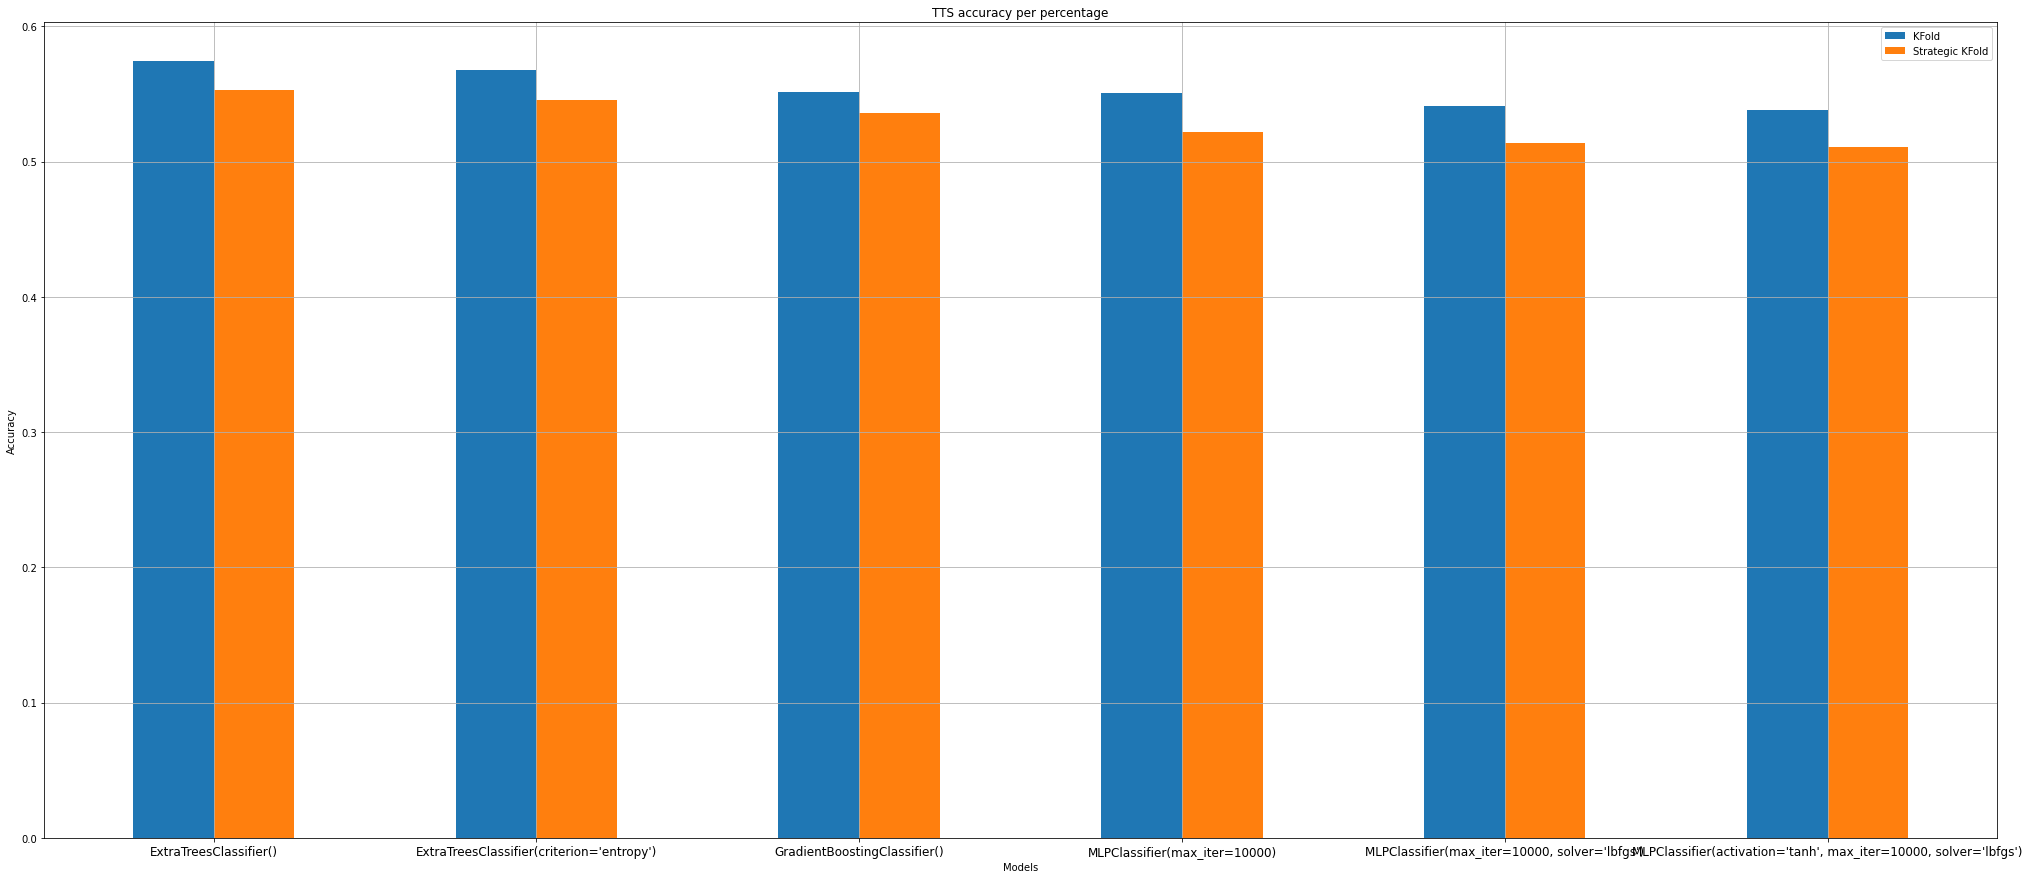

In [97]:
import matplotlib.pyplot as plt

# Extract keys and values
# del other_dict[NuSVC()]
# del other_dict[NuSVC()]
# del other_dict[GaussianNB()]


# keys = list(kf_cross_val_dict.keys())[13:13+6]+list(kf_cross_val_dict.keys())[13+7:13+11]
# values = list(kf_cross_val_dict.values())[13:13+6]+list(kf_cross_val_dict.values())[13+7:13+11]
keys = list(kf_cross_val_dict.keys())[13+4:21]+list(kf_cross_val_dict.keys())[-4::3]
values = list(kf_cross_val_dict.values())[13+4:21]+list(kf_cross_val_dict.values())[-4::3]
# values[8]='KNN'
# Convert values to numpy array for easier manipulation
values = np.array(values)

# Number of bars
n = len(keys)

# Width of each bar
bar_width = 0.25

# Define the positions for each group
x = np.arange(n)

# Create the plot
fig, ax = plt.subplots(figsize=(35,15))
percent=['KFold','Strategic KFold']
for i in range(len(values[0])):
    ax.bar(x + i * bar_width, values[:, i], width=bar_width, label=percent[i])

# Add labels, title, legend, and adjust layout

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('TTS accuracy per percentage')
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(keys)
ax.grid(True)
ax.legend()
plt.xticks(fontsize=12)  # Adjust the fontsize as needed

# Show plot
plt.show()

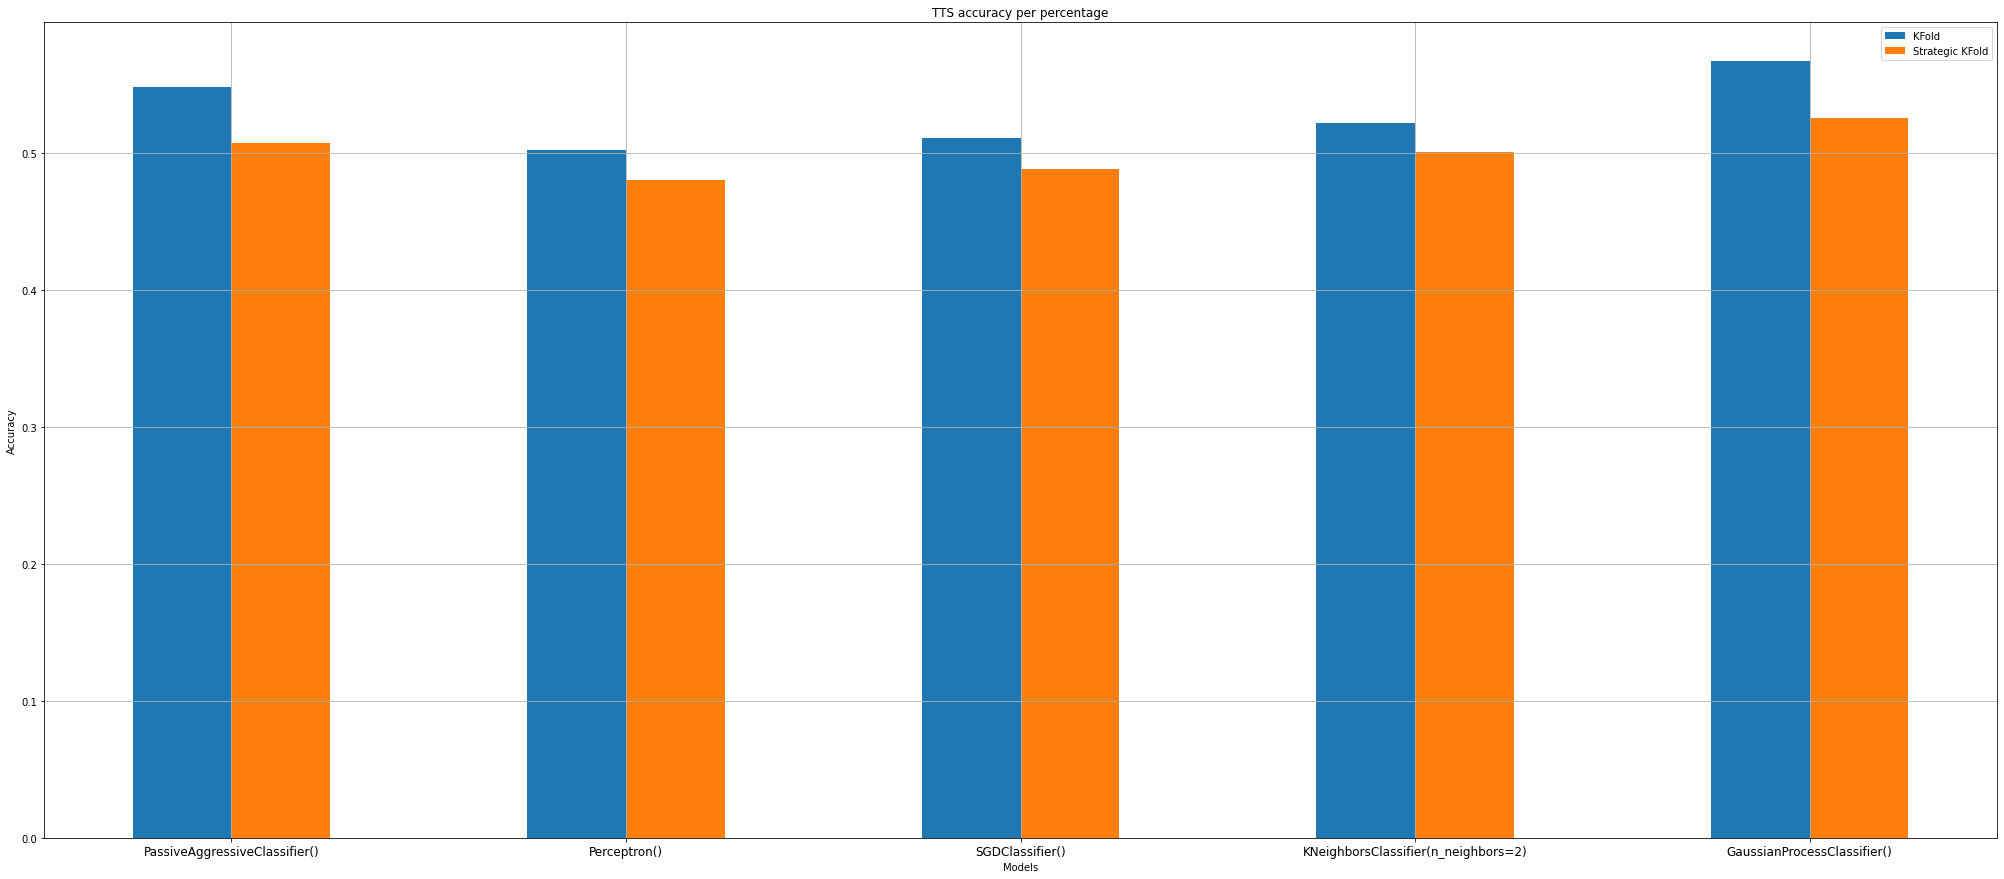

In [100]:
import matplotlib.pyplot as plt

# Extract keys and values
# del other_dict[NuSVC()]
# del other_dict[NuSVC()]
# del other_dict[GaussianNB()]


keys = list(kf_cross_val_dict.keys())[:2]+list(kf_cross_val_dict.keys())[7:10]
values = list(kf_cross_val_dict.values())[:2]+list(kf_cross_val_dict.values())[7:10]

# values[8]='KNN'
# Convert values to numpy array for easier manipulation
values = np.array(values)

# Number of bars
n = len(keys)

# Width of each bar
bar_width = 0.25

# Define the positions for each group
x = np.arange(n)

# Create the plot
fig, ax = plt.subplots(figsize=(35,15))
percent=['KFold','Strategic KFold']
for i in range(len(values[0])):
    ax.bar(x + i * bar_width, values[:, i], width=bar_width, label=percent[i])

# Add labels, title, legend, and adjust layout

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('TTS accuracy per percentage')
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(keys)
ax.grid(True)
ax.legend()
plt.xticks(fontsize=12)  # Adjust the fontsize as needed

# Show plot
plt.show()

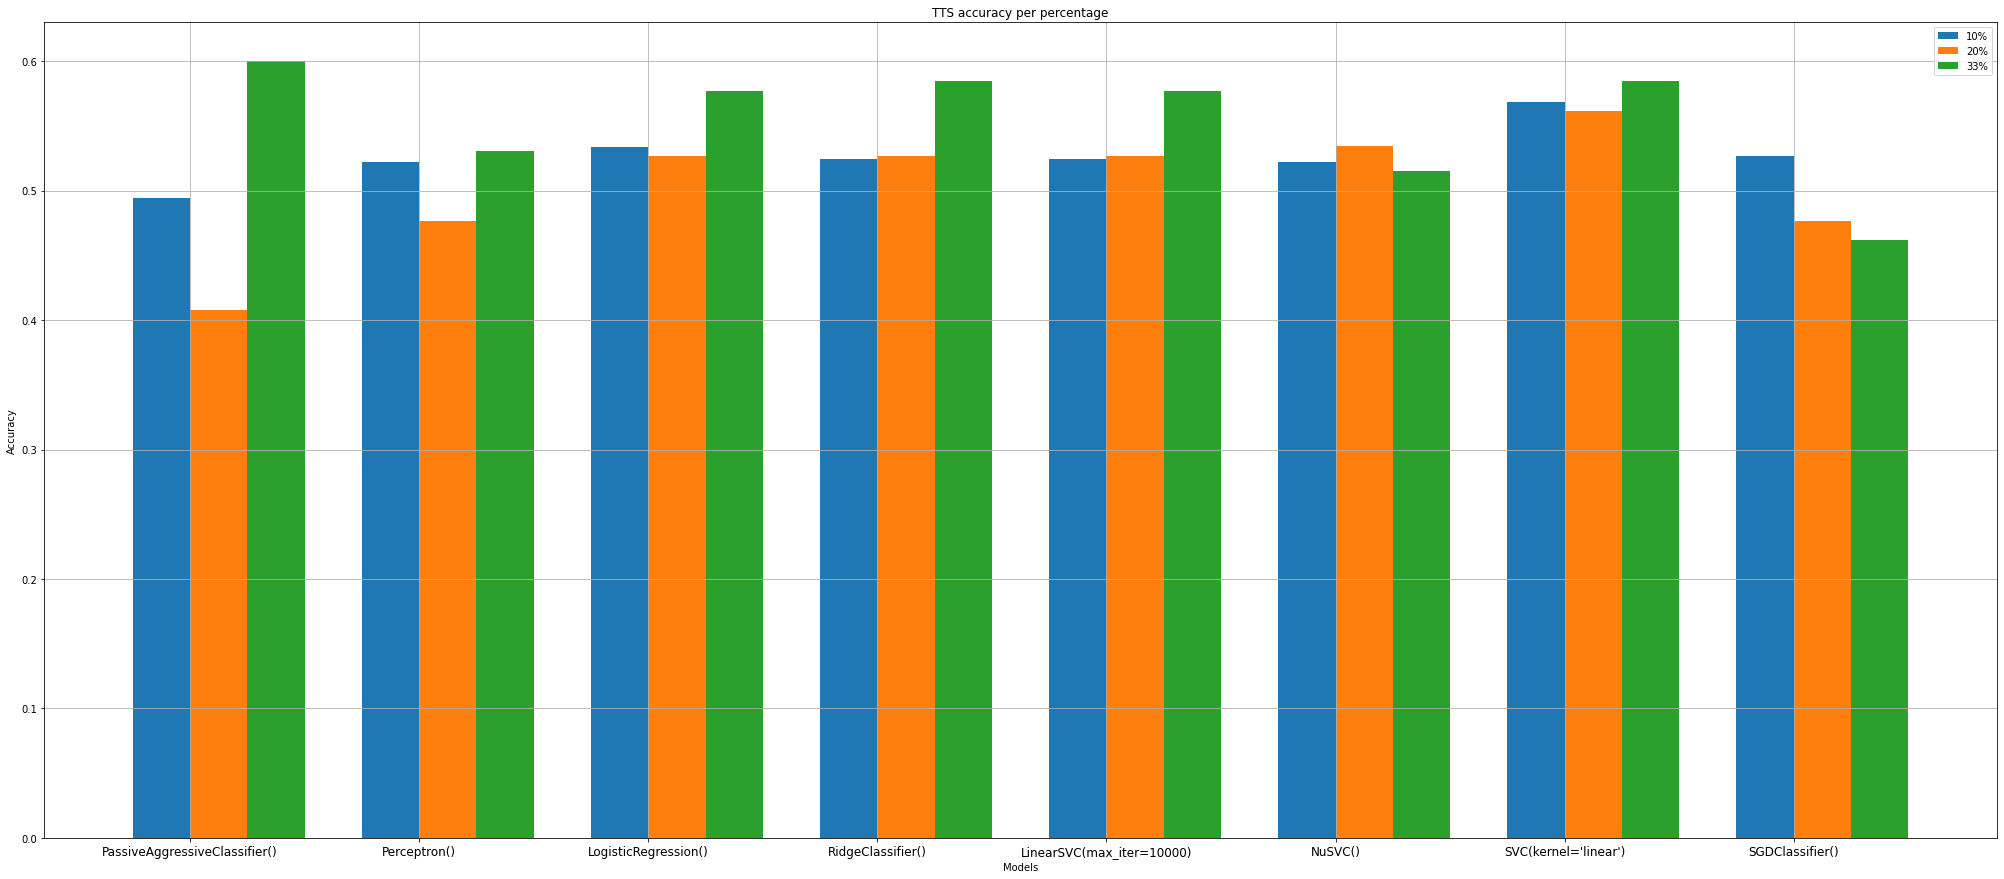

In [64]:
import matplotlib.pyplot as plt

# Extract keys and values
# del other_dict[NuSVC()]
# del other_dict[NuSVC()]
# del other_dict[GaussianNB()]


keys = list(other_dict.keys())[:8]
values = list(other_dict.values())[:8]

# values[8]='KNN'
# Convert values to numpy array for easier manipulation
values = np.array(values)

# Number of bars
n = len(keys)

# Width of each bar
bar_width = 0.25

# Define the positions for each group
x = np.arange(n)

# Create the plot
fig, ax = plt.subplots(figsize=(35,15))
percent=['10%','20%','33%']
for i in range(len(values[0])):
    ax.bar(x + i * bar_width, values[:, i], width=bar_width, label=percent[i])

# Add labels, title, legend, and adjust layout

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('TTS accuracy per percentage')
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(keys)
ax.grid(True)
ax.legend()
plt.xticks(fontsize=12)  # Adjust the fontsize as needed

# Show plot
plt.show()

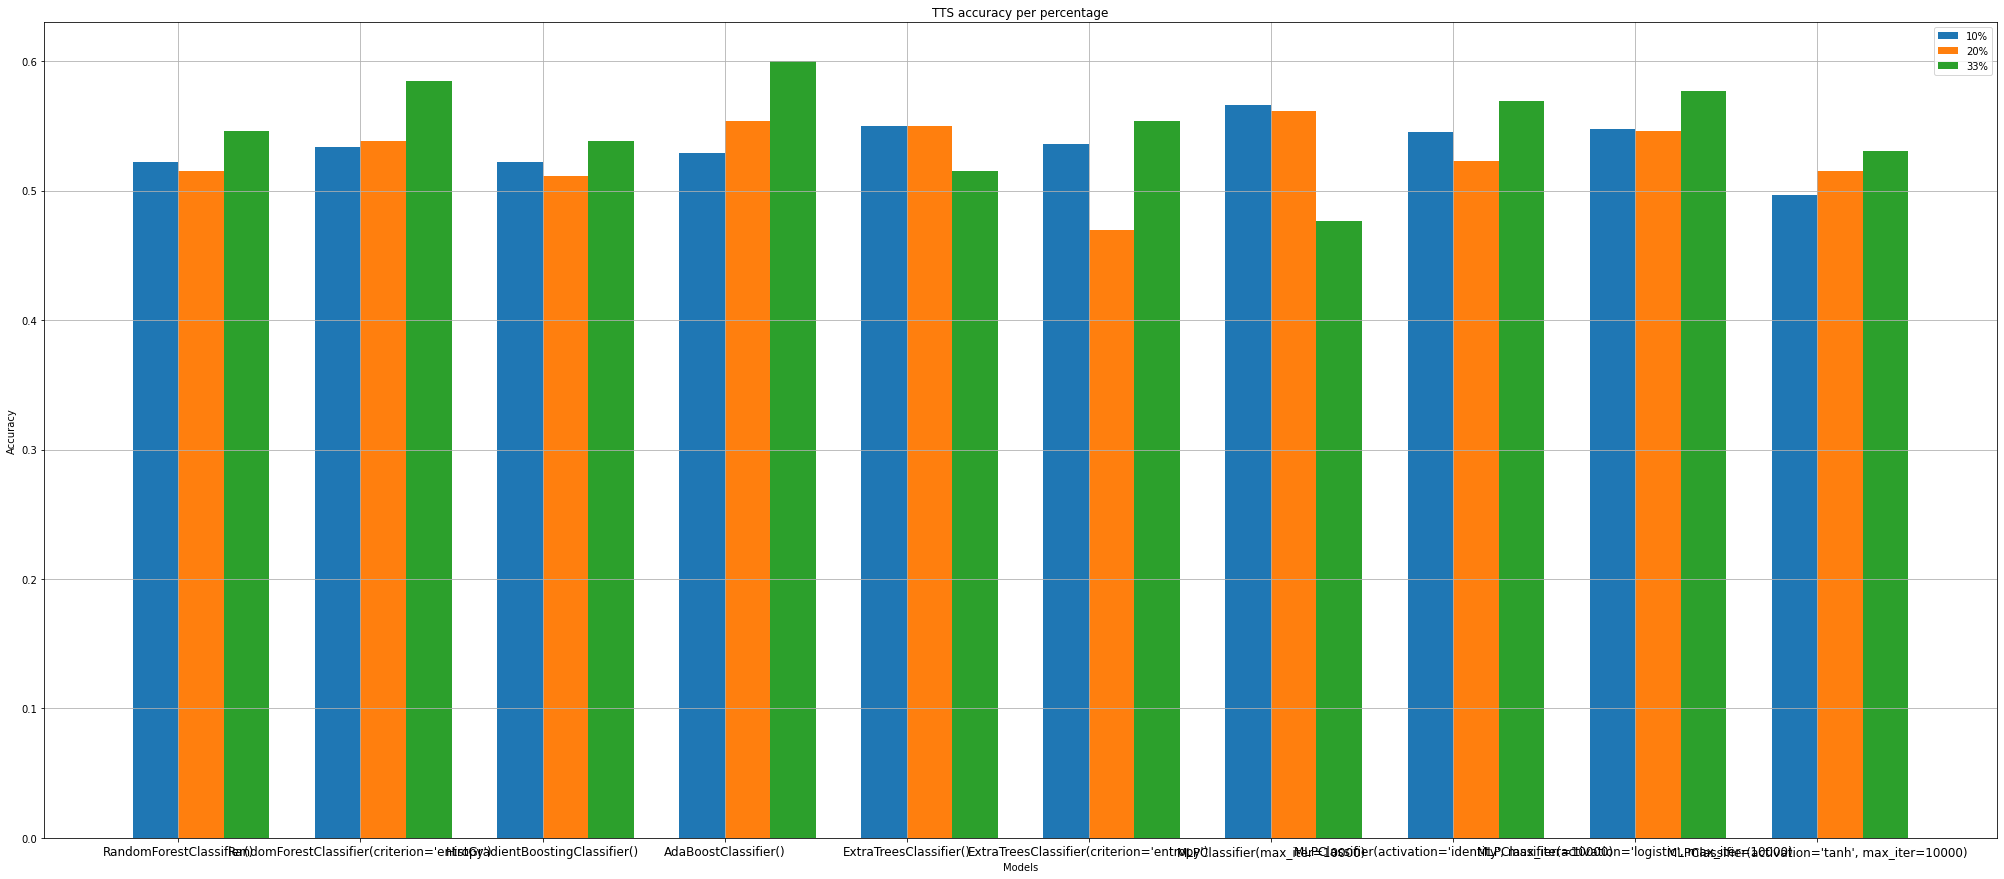

In [72]:
import matplotlib.pyplot as plt

# Extract keys and values
# del other_dict[NuSVC()]
# del other_dict[NuSVC()]
# del other_dict[GaussianNB()]


keys = list(ensemble_dict.keys())[0:6]+list(ensemble_dict.keys())[7:11]
values = list(ensemble_dict.values())[0:6]+list(ensemble_dict.values())[7:11]

# values[8]='KNN'
# Convert values to numpy array for easier manipulation
values = np.array(values)

# Number of bars
n = len(keys)

# Width of each bar
bar_width = 0.25

# Define the positions for each group
x = np.arange(n)

# Create the plot
fig, ax = plt.subplots(figsize=(35,15))
percent=['10%','20%','33%']
for i in range(len(values[0])):
    ax.bar(x + i * bar_width, values[:, i], width=bar_width, label=percent[i])

# Add labels, title, legend, and adjust layout

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('TTS accuracy per percentage')
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(keys)
ax.grid(True)
ax.legend()
plt.xticks(fontsize=12)  # Adjust the fontsize as needed

# Show plot
plt.show()

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
print(X.shape)
# for f in X.keys():
plt.figure(figsize=(10, 10))
plt_data=X.iloc[:,:-1]
print(X.columns)
plt_data=plt_data.drop(['loudness','key'],axis=1)
plt.boxplot(plt_data)
plt.title('Box Plot')
plt.xlabel('Groups')
plt.ylabel('Values')
plt.grid(True)
plt.show()

NameError: name 'X' is not defined